># **`Insurance Prediction`**



# **Import Libraries**

In [1]:
#
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# **`Getting the Data`**

In [2]:
test_df = pd.read_csv("C:\\Users\\Mani Teja\\Downloads\\Insurance Prediction\\TEST.csv")
train_df= pd.read_csv("C:\\Users\\Mani Teja\\Downloads\\Insurance Prediction\\TRAIN.csv")

# **Data Exploration/Analysis**

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    304887 non-null  int64 
 1   Gender                304887 non-null  object
 2   Age                   304887 non-null  int64 
 3   Driving_License       304887 non-null  int64 
 4   Region_Code           304887 non-null  int64 
 5   Previously_Insured    304887 non-null  int64 
 6   Vehicle_Age           304887 non-null  object
 7   Vehicle_Damage        304887 non-null  object
 8   Annual_Premium        304887 non-null  int64 
 9   Policy_Sales_Channel  304887 non-null  int64 
 10  Vintage               304887 non-null  int64 
 11  Response              304887 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 27.9+ MB


In [4]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,190464.686973,38.832545,0.997875,26.381348,0.458435,30567.921318,112.021946,154.293105,0.122357
std,109998.823015,15.520667,0.046053,13.235034,0.498270,17255.545191,54.212188,83.713258,0.327698
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95183.500000,25.000000,1.000000,15.000000,0.000000,24409.000000,29.000000,82.000000,0.000000
50%,190485.000000,36.000000,1.000000,28.000000,0.000000,31673.000000,133.000000,154.000000,0.000000
75%,285642.500000,49.000000,1.000000,35.000000,1.000000,39393.000000,152.000000,227.000000,0.000000
max,381108.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
train_df.head(15)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0
5,40471,Male,62,1,28,0,1-2 Year,No,43086,124,239,0
6,16714,Male,47,1,28,1,1-2 Year,No,35789,26,12,0
7,329088,Male,57,1,28,0,1-2 Year,Yes,38952,26,255,1
8,345343,Male,23,1,16,1,< 1 Year,No,32018,152,134,0
9,7999,Female,63,1,46,0,1-2 Year,Yes,2630,26,107,0


In [7]:
train_df.columns.values

array(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype=object)

C:\Users\Mani Teja\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


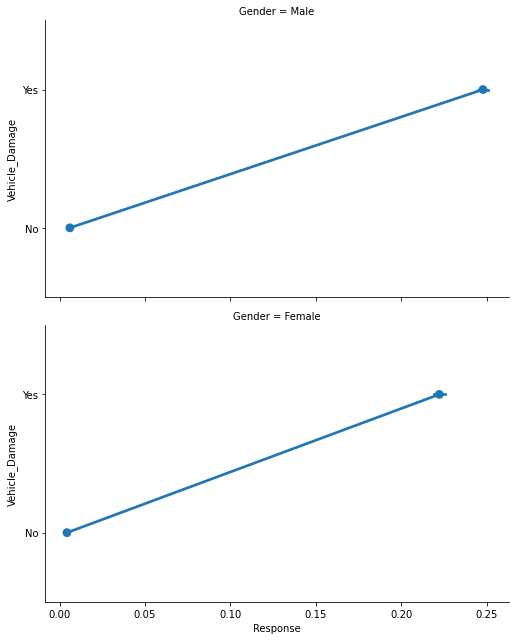

In [8]:
FacetGrid = sns.FacetGrid(train_df, row='Gender', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot,  'Response', 'Vehicle_Damage', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

<AxesSubplot:xlabel='Response', ylabel='Age'>

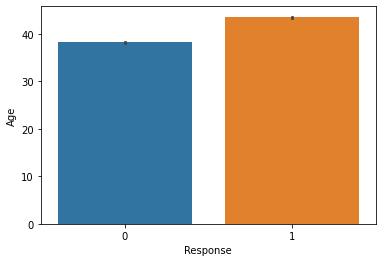

In [9]:
sns.barplot(x='Response', y='Age', data=train_df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df['Vehicle_Damage']=le.fit_transform(train_df['Vehicle_Damage'])
test_df['Vehicle_Damage']=le.fit_transform(test_df['Vehicle_Damage'])

In [11]:
train_df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.002400,0.000046,-0.000729,0.002687,-0.001143,0.002496,-0.003189,0.000323,-0.002936
Age,0.002400,1.000000,-0.079636,0.040662,-0.255066,0.267805,0.066909,-0.577554,-0.001894,0.111127
Driving_License,0.000046,-0.079636,1.000000,-0.000893,0.014160,-0.015799,-0.010847,0.043574,-0.000192,0.010495
Region_Code,-0.000729,0.040662,-0.000893,1.000000,-0.022904,0.026856,-0.010768,-0.041076,-0.001534,0.008980
Previously_Insured,0.002687,-0.255066,0.014160,-0.022904,1.000000,-0.824149,0.002652,0.219877,0.003221,-0.340982
Vehicle_Damage,-0.001143,0.267805,-0.015799,0.026856,-0.824149,1.000000,0.011058,-0.224858,-0.001596,0.354266
Annual_Premium,0.002496,0.066909,-0.010847,-0.010768,0.002652,0.011058,1.000000,-0.112980,-0.000518,0.021832
Policy_Sales_Channel,-0.003189,-0.577554,0.043574,-0.041076,0.219877,-0.224858,-0.112980,1.000000,0.001101,-0.138673
Vintage,0.000323,-0.001894,-0.000192,-0.001534,0.003221,-0.001596,-0.000518,0.001101,1.000000,0.000247
Response,-0.002936,0.111127,0.010495,0.008980,-0.340982,0.354266,0.021832,-0.138673,0.000247,1.000000


# **Data Preprocessing**

# **Building Machine Learning Models**

In [12]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
X_train = train_df.drop(["Response","id","Gender","Vehicle_Age","Driving_License","Region_Code","Vintage"], axis=1)
Y_train = train_df["Response"]
X_test  = test_df.drop(["id","Gender","Vehicle_Age","Driving_License","Region_Code","Vintage"], axis=1).copy()

linear_svc = SVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

In [14]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.61 %


In [15]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

87.21 %


In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

89.27 %


In [17]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

97.61 %


In [18]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_log, acc_knn,
              acc_random_forest,  acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.61,Random Forest
97.61,Decision Tree
89.27,Logistic Regression
87.21,KNN


In [19]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [20]:
importances.head(15)

,importance
feature,
Annual_Premium,0.698
Age,0.093
Vehicle_Damage,0.083
Previously_Insured,0.070
Policy_Sales_Channel,0.057


<AxesSubplot:xlabel='feature'>

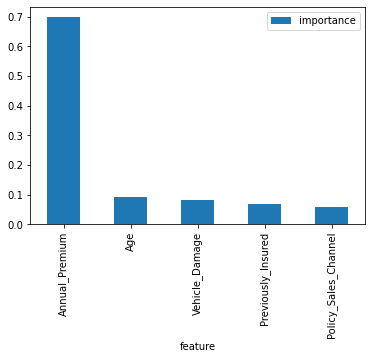

In [21]:
importances.plot.bar()

**Conclusion:**

not_alone and Parch doesn't play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it's just fine to remove only Alone and Parch.

In [22]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,1,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,1,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,1,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,1,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,0,38009,152,106,0


**Training random forest again:**

In [23]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.61 %


In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[248284,  19298],
       [ 28828,   8477]], dtype=int64)

# **Submission**

In [ ]:
submission = pd.DataFrame({
        "Id": test_df["id"],
        "Response": Y_prediction
    })
submission.to_csv('submission.csv', index=False)